In [1]:
from torchvision import datasets, transforms

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2, linewidth=75)
torch.manual_seed(123)

## Preparing Data 

In [2]:
data_path = ".\\CIFAR10\\"

cifar10 = datasets.CIFAR10(
    data_path, train = True, download = False, 
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
    ]))

cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),(0.2470, 0.2435, 0.2616))
    ]))

In [3]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']

cifar2 = [(img, label_map[label])
          for img, label in cifar10 
          if label in [0, 2]]

cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

## Model Building

In [4]:
import torch.nn as nn

In [5]:
n_out = 2

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, n_out),
            nn.LogSoftmax(dim = 1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


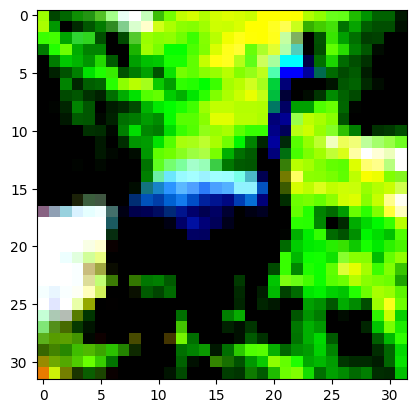

In [6]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))

In [7]:
img_batch = img.view(-1).unsqueeze(0)
img_batch, img_batch.shape

(tensor([[ 0.6143, -0.3224,  ..., -1.3170, -1.0472]]), torch.Size([1, 3072]))

In [8]:
out = model(img_batch)
out

tensor([[-0.9942, -0.4621]], grad_fn=<LogSoftmaxBackward0>)

In [9]:
_, index = torch.max(out, dim=1)

index

tensor([1])

In [10]:
loss = nn.NLLLoss()

In [11]:
img, label = cifar2[0]

out = model(img.view(-1).unsqueeze(0))

loss(out, torch.tensor([label]))

tensor(0.4621, grad_fn=<NllLossBackward0>)

## Classifier Learning -> Using ALL Data

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim

is_cuda = torch.cuda.is_available()


model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim = 1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr = learning_rate)
loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f"Epoch: {epoch} Loss: {float(loss)}")

Epoch: 0 Loss: 6.284517765045166
Epoch: 1 Loss: 5.426993370056152
Epoch: 2 Loss: 8.073309898376465
Epoch: 3 Loss: 4.434668064117432
Epoch: 4 Loss: 8.861948013305664
Epoch: 5 Loss: 9.270270347595215
Epoch: 6 Loss: 3.494992256164551
Epoch: 7 Loss: 10.184905052185059
Epoch: 8 Loss: 5.14982271194458
Epoch: 9 Loss: 6.442326068878174
Epoch: 10 Loss: 4.864918231964111
Epoch: 11 Loss: 0.4014187455177307
Epoch: 12 Loss: 5.905603408813477
Epoch: 13 Loss: 9.196324348449707
Epoch: 14 Loss: 6.336201190948486
Epoch: 15 Loss: 7.3022918701171875
Epoch: 16 Loss: 1.2945443391799927
Epoch: 17 Loss: 2.1799919605255127
Epoch: 18 Loss: 2.185661792755127
Epoch: 19 Loss: 6.984148025512695
Epoch: 20 Loss: 6.187165260314941
Epoch: 21 Loss: 10.507281303405762
Epoch: 22 Loss: 15.746715545654297
Epoch: 23 Loss: 7.049489974975586
Epoch: 24 Loss: 8.473156929016113
Epoch: 25 Loss: 9.45479965209961
Epoch: 26 Loss: 13.265739440917969
Epoch: 27 Loss: 10.392166137695312
Epoch: 28 Loss: 0.5355349183082581
Epoch: 29 Loss: 

## Mini Batch Loader

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size = 64, shuffle = True)    # (64, 3, 32, 32)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim = 1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr = learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
                       
    print(f"Epoch: {epoch} Loss: {float(loss)}")

Epoch: 0 Loss: 0.4508588910102844
Epoch: 1 Loss: 0.40345385670661926
Epoch: 2 Loss: 0.4343932271003723
Epoch: 3 Loss: 0.22966347634792328
Epoch: 4 Loss: 0.43694308400154114
Epoch: 5 Loss: 0.5319609642028809
Epoch: 6 Loss: 0.6383283138275146
Epoch: 7 Loss: 0.3932562470436096
Epoch: 8 Loss: 0.3403806686401367
Epoch: 9 Loss: 0.22322754561901093
Epoch: 10 Loss: 0.3455077111721039
Epoch: 11 Loss: 0.2935001254081726
Epoch: 12 Loss: 0.45567044615745544
Epoch: 13 Loss: 0.18465575575828552
Epoch: 14 Loss: 0.399518221616745
Epoch: 15 Loss: 0.5175514817237854
Epoch: 16 Loss: 0.27199164032936096
Epoch: 17 Loss: 0.14636452496051788
Epoch: 18 Loss: 0.40385276079177856
Epoch: 19 Loss: 0.37309834361076355
Epoch: 20 Loss: 0.4195271134376526
Epoch: 21 Loss: 0.5049251317977905
Epoch: 22 Loss: 0.18410471081733704
Epoch: 23 Loss: 0.3038555681705475
Epoch: 24 Loss: 0.30665141344070435
Epoch: 25 Loss: 0.48862800002098083
Epoch: 26 Loss: 0.1370086967945099
Epoch: 27 Loss: 0.23324072360992432
Epoch: 28 Loss: 0

In [18]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size = 64, shuffle = True)    # (64, 3, 32, 32)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print(f"Accuracy : {float(correct / total)}")

Accuracy : 0.8215


## Model Parameter Counts

In [20]:
numel_list = [p.numel() for p in model.parameters() if p.requires_grad == True]
sum(numel_list), numel_list

(1574402, [1572864, 512, 1024, 2])

In [21]:
linear = nn.Linear(3072, 1024)
linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))

## Increase Mini Batch Size 

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size = 128, shuffle = True)    # (128, 3, 32, 32)

print(train_loader)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim = 1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr = learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
                       
    print(f"Epoch: {epoch} Loss: {float(loss)}")

Epoch: 0 Loss: 0.44410067796707153
Epoch: 1 Loss: 0.5403022766113281
Epoch: 2 Loss: 0.4614195227622986
Epoch: 3 Loss: 0.4297323524951935
Epoch: 4 Loss: 0.5954849720001221
Epoch: 5 Loss: 0.30401524901390076
Epoch: 6 Loss: 0.5017366409301758
Epoch: 7 Loss: 0.30500882863998413
Epoch: 8 Loss: 0.2971315383911133
Epoch: 9 Loss: 0.38058894872665405
Epoch: 10 Loss: 0.24604953825473785
Epoch: 11 Loss: 0.29362723231315613
Epoch: 12 Loss: 0.20171567797660828
Epoch: 13 Loss: 0.39221078157424927
Epoch: 14 Loss: 0.2017107754945755
Epoch: 15 Loss: 0.46517279744148254
Epoch: 16 Loss: 0.4052429497241974
Epoch: 17 Loss: 0.2602967917919159
Epoch: 18 Loss: 0.40013521909713745
Epoch: 19 Loss: 0.5454908013343811
Epoch: 20 Loss: 0.41754618287086487
Epoch: 21 Loss: 0.348655641078949
Epoch: 22 Loss: 0.4761049449443817
Epoch: 23 Loss: 0.42005205154418945
Epoch: 24 Loss: 0.2798437774181366
Epoch: 25 Loss: 0.3007623851299286
Epoch: 26 Loss: 0.3942333459854126
Epoch: 27 Loss: 0.24551281332969666
Epoch: 28 Loss: 0.

In [31]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size = 128, shuffle = True)    # (128, 3, 32, 32)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print(f"Accuracy : {float(correct / total)}")

Accuracy : 0.818


In [32]:
numel_list = [p.numel() for p in model.parameters() if p.requires_grad == True]
sum(numel_list), numel_list

(1574402, [1572864, 512, 1024, 2])